# CSE 6367 Programming Assignment 2 (P2)

## Fall 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1 (30 points) 

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

In [41]:
# Hough transform to detect lines
def houghLine(image):
    ''' Basic Hough line transform that builds the accumulator array
    Input : image : edge image (canny)
    Output : accumulator : the accumulator of hough space
             thetas : values of theta (-90 : 90)
             rs : values of radius (-max distance : max distance)
    '''
    #Get image dimensions
    # y for rows and x for columns 
    Ny = image.shape[0]
    Nx = image.shape[1]

    #Max diatance is diagonal one 
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))
    
    # Theta in range from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90, 90))
    #Range of radius
    rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)
    
    accumulator = np.zeros((2 * Maxdist, len(thetas)))
    for y in range(Ny):
        for x in range(Nx):
            # Check if it is an edge pixel
            #  NB: y -> rows , x -> columns
            if image[y,x] > 0:
                # Map edge pixel to hough space
                for k in range(len(thetas)):
                    # Calculate space parameter
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
                    # Update the accumulator
                    # N.B: r has value -max to max
                    # map r to its idx 0 : 2*max
                    accumulator[int(r) + Maxdist,k] += 1
    return accumulator, thetas, rs

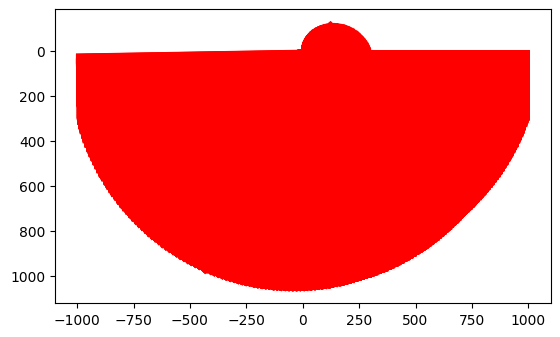

In [45]:
import numpy as np
import math
import cv2

def create_lines(accumulator, thetas, rs, threshold):
    lines = []  # List to store the detected lines

    while True:
        # Find the maximum value in the accumulator
        max_value = np.max(accumulator)
        
        # Check if the maximum value is above the threshold
        if max_value >= threshold:
            # Get the indices of the maximum value
            max_index = np.argwhere(accumulator == max_value)[0]
            rho = rs[max_index[0]]
            theta = thetas[max_index[1]]

            # Convert (rho, theta) to (x1, y1) and (x2, y2)
            x1 = int(rho * np.cos(theta))
            y1 = int(rho * np.sin(theta))
            
            # Find a second point on the line by adding/subtracting an arbitrary distance
            length = 1000  # You can adjust this value based on your image size
            x2 = int(x1 + length * (-np.sin(theta)))
            y2 = int(y1 + length * (np.cos(theta)))

            # Add the line to the list
            lines.append(((x1, y1), (x2, y2)))

            # Zero out the accumulator cell to ignore it in the next iteration
            accumulator[max_index[0], max_index[1]] = 0
        else:
            break

    return lines


# Superimpose the lines on the original image
# Load your original image here (replace 'your_image.jpg' with your image file path)
image = cv2.imread('./Images/lines.jpg', cv2.IMREAD_GRAYSCALE)
image_with_lines = image.copy()

accumulator, thetas, rs = houghLine(image)  # Use your houghLine function
threshold = 100  # Adjust this value as needed
detected_lines = create_lines(accumulator, thetas, rs, threshold)


fig, ax = plt.subplots()

# Display the original image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw the detected lines on the image
for line in detected_lines:
    x1, y1 = line[0]
    x2, y2 = line[1]
    ax.plot([x1, x2], [y1, y2], color='red', linewidth=2)

plt.show()


### Task 2 (30 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/circles.jpg>

In [ ]:
# Hough transform to detect circles

### Task 3 (40 points)

Implement Harris corner detector from scratch. Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() or any other library functions to detect the corners.

<img src = Images/corners.jpg>

In [ ]:
# Harris corner detection

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
